In [1]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio
import scipy.io.wavfile
Fs, y = scipy.io.wavfile.read('train_bird.wav')
Audio(y, rate=Fs)

In [2]:
#DFT Transform pf y
F = fft(y) #use Scipy COnvention

Text(0.5, 1.0, 'Time domain')

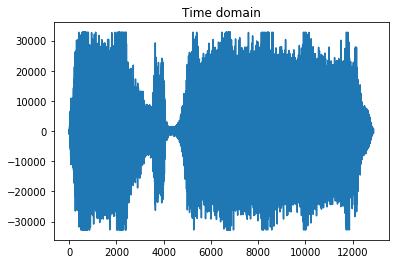

In [3]:
#Plotting sound file in the time domain
plt.plot(y)
plt.title('Time domain')

Text(0.5, 1.0, 'Frequency domain')

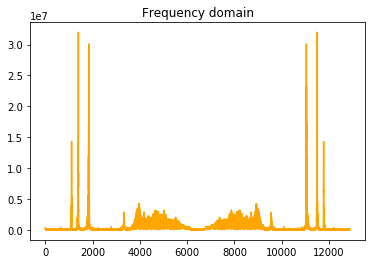

In [4]:
#plotting abs(F) in the frequency domain
plt.plot(abs(F), color='orange')
plt.title('Frequency domain')

(2937270.7428702475-319282.71618341794j)


C:\Users\graciex\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Train Frequency domain')

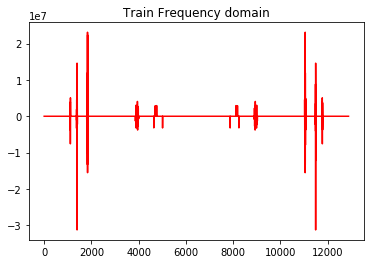

In [11]:
#Train sound separation 4500:6000
Q = []
B = []
p = max(F[4500:6000])
for i in range(len(F)):
    if abs(F[i]) < abs(p):
        Q.append(0)
    else:
        Q.append(1)

print(p)
for i in range(len(F)):
    B.append(F[i]*Q[i])
    
plt.plot(B, color='red')
plt.title('Train Frequency domain')

C:\Users\graciex\Anaconda3\lib\site-packages\IPython\lib\display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


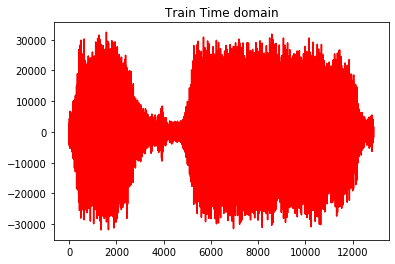

In [12]:
b = ifft(B)
plt.plot(b, color='red')
plt.title('Train Time domain')
Audio(b, rate = Fs)

Text(0.5, 1.0, 'Bird Frequency domain')

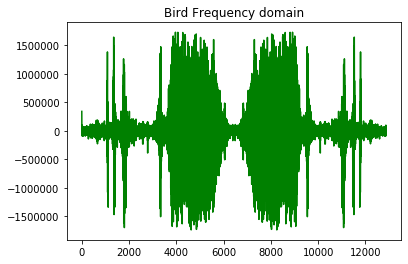

In [13]:
#Train sound separation 4200:4250
Q = []
B = []
p = max(F[4200:4250]) #filter threshhold

for i in range(len(F)):
    if abs(F[i]) > abs(p):
        Q.append(0)
    else:
        Q.append(1)

for i in range(len(F)):
    B.append(F[i]*Q[i])
    
plt.plot(B, color='green')
plt.title('Bird Frequency domain')

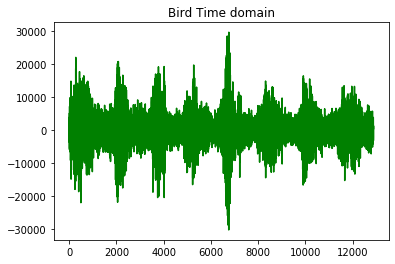

In [14]:
b = ifft(B)
plt.plot(b, color='green')
plt.title('Bird Time domain')
Audio(b, rate = Fs)